In [3]:
!git clone https://github.com/phuockhanhle/SY09_pokemon.git

fatal: destination path 'SY09_pokemon' already exists and is not an empty directory.


In [4]:
%cd SY09_pokemon

/content/SY09_pokemon


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def import_data(filename):
    df = pd.read_csv(filename)
    X = df.drop(columns = 'winner')
    X = X.drop(columns=['Unnamed: 0'])
    X.loc[X['p1_legen']==True,'p1_legen'] = 1
    X.loc[X['p2_legen']==True,'p2_legen'] = 1
    X.loc[X['p1_legen']==False,'p1_legen'] = 0
    X.loc[X['p2_legen']==False,'p2_legen'] = 0
    y = df['winner']
    return X,y

In [0]:

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.metrics import f1_score,log_loss,accuracy_score

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from statistics import  mean
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
def base_line(X,y):
  y = list(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  m = [1,2,3,4]
  df = pd.DataFrame({"type_acc":["f1_score","cross_val","Log_loss","accuracy"]
                     ,"K_nearest":m,"LDA":m,"QDA":m,"GNB":m,"Logistic":m,"Tree":m,"randomForest":m})

  LDA = LinearDiscriminantAnalysis()
  LDA.fit(X_train,y_train)
  df.loc[df["LDA"]==1,"LDA"] = f1_score(y_test,LDA.predict(X_test))
  df.loc[df["LDA"]==2,"LDA"] = mean(cross_val_score(LDA,X_train,y_train,cv=10))
  df.loc[df["LDA"]==3,"LDA"] = log_loss(y_test,LDA.predict(X_test))
  df.loc[df["LDA"]==4,"LDA"] = accuracy_score(y_test,LDA.predict(X_test))


  QDA = QuadraticDiscriminantAnalysis()
  QDA.fit(X_train,y_train)
  df.loc[df["QDA"]==1,"QDA"] = f1_score(y_test,QDA.predict(X_test))
  df.loc[df["QDA"]==2,"QDA"] = mean(cross_val_score(QDA,X_train,y_train,cv=10))
  df.loc[df["QDA"]==3,"QDA"] = log_loss(y_test,QDA.predict(X_test))
  df.loc[df["QDA"]==4,"QDA"] = accuracy_score(y_test,QDA.predict(X_test))

  GNB = GaussianNB()
  GNB.fit(X_train,y_train)
  df.loc[df["GNB"]==1,"GNB"] = f1_score(y_test,GNB.predict(X_test))
  df.loc[df["GNB"]==2,"GNB"] = mean(cross_val_score(GNB,X_train,y_train,cv=10))
  df.loc[df["GNB"]==3,"GNB"] = log_loss(y_test,GNB.predict(X_test))
  df.loc[df["GNB"]==4,"GNB"] = accuracy_score(y_test,GNB.predict(X_test))

  Logistic = LogisticRegression()
  Logistic.fit(X_train,y_train)
  df.loc[df["Logistic"]==1,"Logistic"] = f1_score(y_test,Logistic.predict(X_test))
  df.loc[df["Logistic"]==2,"Logistic"] = mean(cross_val_score(Logistic,X_train,y_train,cv=10))
  df.loc[df["Logistic"]==3,"Logistic"] = log_loss(y_test,Logistic.predict(X_test))
  df.loc[df["Logistic"]==4,"Logistic"] = accuracy_score(y_test,Logistic.predict(X_test))

  Tree = DecisionTreeClassifier()
  Tree.fit(X_train,y_train)
  df.loc[df["Tree"]==1,"Tree"] = f1_score(y_test,Tree.predict(X_test))
  df.loc[df["Tree"]==2,"Tree"] = mean(cross_val_score(Tree,X_train,y_train,cv=10))
  df.loc[df["Tree"]==3,"Tree"] = log_loss(y_test,Tree.predict(X_test))
  df.loc[df["Tree"]==4,"Tree"] = accuracy_score(y_test,Tree.predict(X_test))

  randomForest = RandomForestClassifier(n_estimators=30)
  randomForest.fit(X, y)
  df.loc[df["randomForest"]==1,"randomForest"] = f1_score(y_test,randomForest.predict(X_test))
  df.loc[df["randomForest"]==2,"randomForest"] = mean(cross_val_score(randomForest,X_train,y_train,cv=10))
  df.loc[df["randomForest"]==3,"randomForest"] = log_loss(y_test,randomForest.predict(X_test))
  df.loc[df["randomForest"]==4,"randomForest"] = accuracy_score(y_test,randomForest.predict(X_test))

  K_nearest = KNeighborsClassifier(n_neighbors = 1000)
  K_nearest.fit(X, y)
  df.loc[df["K_nearest"]==1,"K_nearest"] = f1_score(y_test,K_nearest.predict(X_test))
  df.loc[df["K_nearest"]==2,"K_nearest"] = mean(cross_val_score(K_nearest,X_train,y_train,cv=10))
  df.loc[df["K_nearest"]==3,"K_nearest"] = log_loss(y_test,K_nearest.predict(X_test))
  df.loc[df["K_nearest"]==4,"K_nearest"] = accuracy_score(y_test,K_nearest.predict(X_test))
  



  return df


In [8]:
df = pd.read_csv("presenation/Original.csv")
from presenation.traitement import onehotencoding
from presenation.traitement import Differ
df = onehotencoding(df)
df = Differ(df)

/content/SY09_pokemon/presenation/traitement.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dif'+str(X.columns[i])[2:]] = X.iloc[:,i] - X.iloc[:,i+6]


In [0]:
X = df.drop(columns = 'winner')
df.loc[df['winner']=='t','winner']=1
df.loc[df['winner']=='f','winner']=0
y = df['winner']

In [10]:
res = base_line(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

In [11]:
res

,type_acc,K_nearest,LDA,QDA,GNB,Logistic,Tree,randomForest
0,f1_score,0.887035,0.878155,0.759877,0.745934,0.880691,0.939144,0.999424
1,cross_val,0.886060,0.885284,0.771851,0.755642,0.887821,0.940299,0.953134
2,Log_loss,3.713487,3.991892,7.977509,8.404537,3.906067,1.990713,0.018839
3,accuracy,0.892485,0.884424,0.769030,0.756667,0.886909,0.942364,0.999455


In [12]:
df = pd.read_csv("presenation/Original.csv")
df = onehotencoding(df)
X = df.drop(columns = 'winner')
df.loc[df['winner']=='t','winner']=1
df.loc[df['winner']=='f','winner']=0
y = df['winner']
df

,p1_hp,p1_atk,p1_def,p1_spatk,p1_spdef,p1_sp,p1_legen,p2_hp,p2_atk,p2_def,p2_spatk,p2_spdef,p2_sp,p2_legen,p1_Bug,p1_Dark,p1_Dragon,p1_Electric,p1_Fairy,p1_Fighting,p1_Fire,p1_Flying,p1_Ghost,p1_Grass,p1_Ground,p1_Ice,p1_Normal,p1_Poison,p1_Psychic,p1_Rock,p1_Steel,p1_Water,p2_Bug,p2_Dark,p2_Dragon,p2_Electric,p2_Fairy,p2_Fighting,p2_Fire,p2_Flying,p2_Ghost,p2_Grass,p2_Ground,p2_Ice,p2_Normal,p2_Poison,p2_Psychic,p2_Rock,p2_Steel,p2_Water,category_1_x,category_2_x,category_3_x,category_4_x,category_5_x,category_6_x,category_1_y,category_2_y,category_3_y,category_4_y,category_5_y,category_6_y,winner
0,50,64,50,45,50,41,0,70,70,40,60,40,60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,91,90,72,90,129,108,1,91,129,90,72,90,108,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,55,40,85,80,105,40,0,75,75,75,125,95,40,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,40,40,40,70,40,20,0,77,120,90,60,90,48,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,70,60,125,115,70,55,0,20,10,230,10,230,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100,120,100,150,120,90,1,30,40,70,70,25,60,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
49996,60,85,40,30,45,68,0,35,55,40,45,40,60,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
49997,60,50,100,85,70,65,0,73,115,60,60,60,90,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
49998,40,30,50,55,55,100,0,25,35,70,95,55,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [13]:
res2=base_line(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

In [14]:
res2

,type_acc,K_nearest,LDA,QDA,GNB,Logistic,Tree,randomForest
0,f1_score,0.847589,0.878798,0.767383,0.729346,0.879883,0.933274,0.999744
1,cross_val,0.850537,0.885075,0.780030,0.741791,0.887254,0.933881,0.928119
2,Log_loss,4.942239,3.966772,7.703288,8.942511,3.939560,2.187482,0.008373
3,accuracy,0.856909,0.885152,0.776970,0.741091,0.885939,0.936667,0.999758


In [0]:
res['type_acc'] = res['type_acc'] + '_avecDiff'

In [0]:
res2['type_acc'] = ["f1_score","cross_val","Log_loss","accuracy"]

In [0]:
res2['type_acc'] += '_sansDiff'

In [25]:
res2

,type_acc,K_nearest,LDA,QDA,GNB,Logistic,Tree,randomForest
0,f1_score_sansDiff,0.847589,0.878798,0.767383,0.729346,0.879883,0.933274,0.999744
1,cross_val_sansDiff,0.850537,0.885075,0.780030,0.741791,0.887254,0.933881,0.928119
2,Log_loss_sansDiff,4.942239,3.966772,7.703288,8.942511,3.939560,2.187482,0.008373
3,accuracy_sansDiff,0.856909,0.885152,0.776970,0.741091,0.885939,0.936667,0.999758


In [0]:
compar = pd.concat([res,res2])

In [27]:
compar

,type_acc,K_nearest,LDA,QDA,GNB,Logistic,Tree,randomForest
0,f1_score_avecDiff,0.887035,0.878155,0.759877,0.745934,0.880691,0.939144,0.999424
1,cross_val_avecDiff,0.886060,0.885284,0.771851,0.755642,0.887821,0.940299,0.953134
2,Log_loss_avecDiff,3.713487,3.991892,7.977509,8.404537,3.906067,1.990713,0.018839
3,accuracy_avecDiff,0.892485,0.884424,0.769030,0.756667,0.886909,0.942364,0.999455
0,f1_score_sansDiff,0.847589,0.878798,0.767383,0.729346,0.879883,0.933274,0.999744
1,cross_val_sansDiff,0.850537,0.885075,0.780030,0.741791,0.887254,0.933881,0.928119
2,Log_loss_sansDiff,4.942239,3.966772,7.703288,8.942511,3.939560,2.187482,0.008373
3,accuracy_sansDiff,0.856909,0.885152,0.776970,0.741091,0.885939,0.936667,0.999758


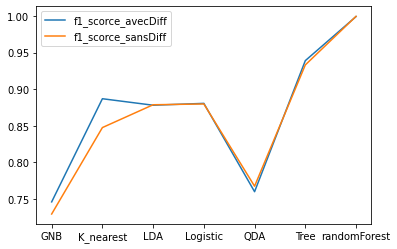

In [28]:
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[0,1:]),label='f1_scorce_avecDiff')
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[4,1:]),label='f1_scorce_sansDiff')


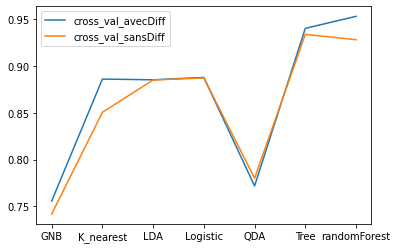

In [29]:
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[1,1:]),label='cross_val_avecDiff')
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[5,1:]),label='cross_val_sansDiff')


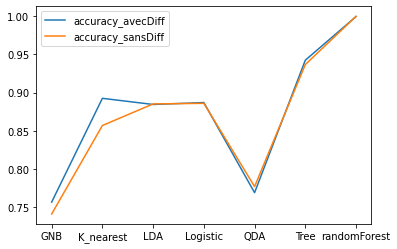

In [32]:
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[3,1:]),label='accuracy_avecDiff')
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[7,1:]),label='accuracy_sansDiff')

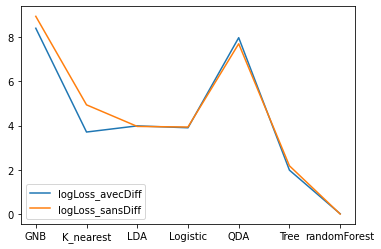

In [34]:
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[2,1:]),label='logLoss_avecDiff')
sns.lineplot(x=compar.columns[1:],y=list(compar.iloc[6,1:]),label='logLoss_sansDiff')

In [0]:
df = pd.read_csv("presenation/traiteQuali_diff.csv")
df = df.drop(columns=['Unnamed: 0'])
X = df.drop(columns = 'winner')
df.loc[df['winner']=='t','winner']=1
df.loc[df['winner']=='f','winner']=0
y = df['winner']


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
res=base_line(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
res

,type_acc,K_nearest,LDA,QDA,GNB,Logistic,Tree,randomForest
0,f1_score,0.833244,0.879392,0.879687,0.813581,0.879088,0.928193,1.0000
1,cross_val,0.834275,0.884625,0.887625,0.820450,0.887650,0.933875,0.9598


In [0]:
df = pd.read_csv("presenation/traiteQuali_PCA.csv")
X = df.drop(columns = 'winner')
df.loc[df['winner']=='t','winner']=1
df.loc[df['winner']=='f','winner']=0
y = df['winner']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [0]:
res = base_line(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
res

,type_acc,K_nearest,LDA,QDA,GNB,Logistic,Tree,randomForest
0,f1_score,1,0.78139,0.775346,0.774263,0.782201,0.789546,1.00000
1,cross_val,2,0.79400,0.785025,0.789600,0.795175,0.793500,0.85605
